# Tutorial : Linear Regression


**COSC 325: Machine Learning**


### Objective


### Part 1: Step-by-Step Tutorial on Linear Regression

In this part, you will learn how to:

1. Load and explore the dataset.
2. Visualize the data.
3. Build and train a linear regression model.
4. Evaluate the model using mean squared error (MSE) and the coefficient of determination ($R^2$) score.


Linear regression is a method used to model the relationship between a dependent variable `Y` and one or more independent variables `X`. This is done using a linear equation in the form:

Y=wX+b

In this equation:

- `w` represents the slope or weight coefficient associated with the independent variable `X`.

- `b` is the intercept term.
- 
The goal of linear regression is to find the values of `w` and `b` that make the predicted values of 
Y as close as possible to the actual data points.

There are different ways to write the equation of a line using various symbols. For better understanding, here are some common notations:


## Equation of Line

Dependent = slope * independent + intercept

$$y = mx + c$$
$$y = ax + b$$
$$y = β_0 + β_1x$$
$$h_θ(x) = θ_0 + θ_1x$$
$$f_w,_b(x) = wx + b$$

| **Dependent** | **Slope** | **Independent** | **Intercept** |
|---------------|-----------|-----------------|---------------|
| $$y$$         | $$m$$     | $$x$$           | $$c$$         |
| $$y$$         | $$a$$     | $$x$$           | $$b$$         |
| $$y$$         | $$β_1$$   | $$x$$           | $$β_0$$       |
| $$h_θ(x)$$    | $$θ_1$$   | $$x$$           | $$θ_0$$       |
| $$f_{w,b}(x)$$| $$w$$     | $$x$$           | $$b$$         |

# Part 1: Step-by-Step Tutorial

#### 1.1 Import Required Libraries

In this section, we import the necessary libraries for data manipulation, visualization, and machine learning. These libraries include:

- `numpy`: For numerical operations.
- `pandas`: For data manipulation and analysis.
- `matplotlib.pyplot`: For data visualization.
- `LinearRegression` from `sklearn.linear_model`: For building the linear regression model.
- `mean_squared_error` and `r2_score` from `sklearn.metrics`: For evaluating the model.
- `train_test_split` from `sklearn.model_selection`: For splitting the dataset into training and testing sets.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#### 1.2 Load and Explore the Dataset

Here, we load the Ames Housing dataset using the `fetch_openml` function from `sklearn.datasets`. We then extract the `GrLivArea` (Ground Living Area) as our feature (X) and `SalePrice` as our target variable (y) for the linear regression model.

C:\Users\kmusg\anaconda\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


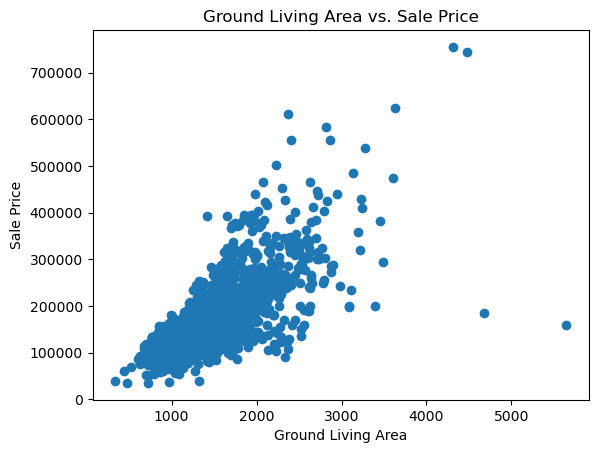

In [43]:
# Load the Ames Housing dataset from OpenML
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
ames_df = housing.frame

# Use 'GrLivArea' and 'SalePrice' for the linear regression model
X = ames_df[['GrLivArea']].values
y = ames_df['SalePrice'].values

# Exploratory Data Analysis
plt.scatter(X, y)
plt.title('Ground Living Area vs. Sale Price')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.show()

##### Explanation:

- Loading the Dataset: We load the Ames Housing dataset using the fetch_openml function from sklearn.datasets. This dataset includes information about various features of houses and their sale prices.
- Selecting Features: We extract the GrLivArea (Ground Living Area) as our feature (X) and SalePrice as our target variable (y) for the linear regression model.
- Exploratory Data Analysis (EDA): We create a scatter plot to visualize the relationship between GrLivArea and SalePrice. The plot shows that as the ground living area increases, the sale price tends to increase as well, indicating a positive correlation between these variables.

##### Output:

- The scatter plot shows a positive trend between ground living area and sale price, suggesting that larger living areas tend to have higher sale prices.

#### 1.3 Prepare the Data for Training

In this step, we split the dataset into training and testing sets using the `train_test_split` function. We allocate 20% of the data for testing and set a random state for reproducibility.

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1.4 Train the Linear Regression Model

We initialize the `LinearRegression` model and train it using the training data (`X_train` and `y_train`). The model learns the relationship between the ground living area and the sale price.

In [45]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### 1.5 Make Predictions

Using the trained model, we make predictions on both the training and testing sets. These predictions will be used to evaluate the model's performance.

In [46]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

##### 1.6 Evaluate the Model

We evaluate the model's performance using the mean squared error (MSE) and the coefficient of determination ($𝑅^2$ score) for both the training and testing sets. MSE measures the average squared difference between the actual and predicted values, while $𝑅^2$ indicates how well the model's predictions match the actual data.

###### Note:

- `mse_train`: This is a variable that holds a floating-point number, representing the Mean Squared Error of the training set.
- `:`: This indicates the start of the format specification.
- `.2f`: This is the format specification itself:
    - `.2`: This specifies that the number should be formatted to 2 decimal places.
    - `f`: This stands for "floating-point number".

In [47]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training MSE: {mse_train:.2f}')
print(f'Testing MSE: {mse_test:.2f}')
print(f'Training R^2: {r2_train:.2f}')
print(f'Testing R^2: {r2_test:.2f}')

Training MSE: 3078116053.86
Testing MSE: 3418946311.18
Training R^2: 0.48
Testing R^2: 0.55


##### 1.7 Visualize the Results

Finally, we visualize the linear regression results. We plot the training data and the corresponding regression line, as well as the testing data and its regression line. This helps us understand how well the model fits the data and generalizes to unseen data.

###### Note:

- `alpha`: This parameter sets the transparency level of the points in the scatter plot. It accepts a floating-point value between `0` and `1`.
    - `alpha=1`: The points are fully opaque (no transparency).
    - `alpha=0`: The points are fully transparent (invisible).
    - Values between `0` and `1`: The points are partially transparent. The closer the value is to `0`, the more transparent the points will be; the closer to `1`, the more opaque the points will be.

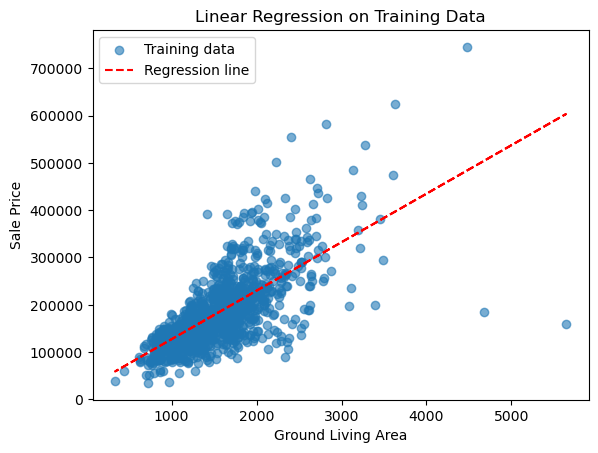

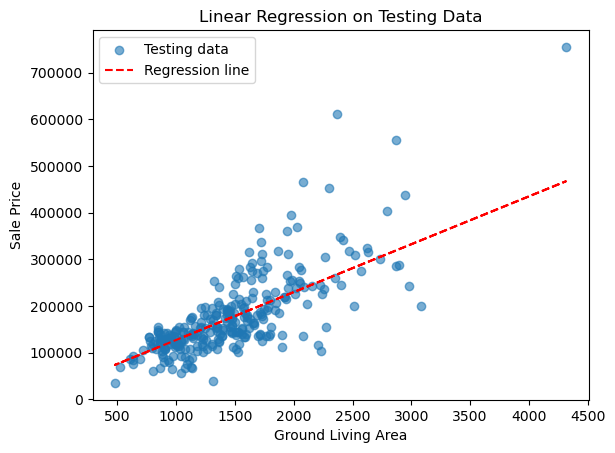

In [55]:
# Visualize the results
plt.scatter(X_train, y_train, alpha=0.6, label='Training data')
plt.plot(X_train, y_train_pred, color='red', label='Regression line', linestyle='--')
plt.title('Linear Regression on Training Data')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

plt.scatter(X_test, y_test, alpha=0.6, label='Testing data')
plt.plot(X_test, y_test_pred, color='red', label='Regression line', linestyle='--')
plt.title('Linear Regression on Testing Data')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

##### Explanation:

- Training Data Visualization:
    - The scatter plot shows the training data points and the regression line fitted to this data.
    - The red dashed line represents the predicted relationship between ground living area and sale price according to the linear regression model.
    - The alignment of the data points around the regression line indicates how well the model fits the training data.
- Testing Data Visualization:
    - The scatter plot shows the testing data points and the regression line based on the training data.
    - This visualization helps assess how well the model generalizes to unseen data.
    - The alignment of the testing data points around the regression line indicates the model's performance on the testing set.

##### Output:

- The plots show that the regression line reasonably fits both the training and testing data. The visual representation of the regression line and data points provides insight into the model's ability to predict sale prices based on ground living area.